https://morvanzhou.github.io/tutorials/machine-learning/keras/2-1-regressor/

## 导入模块并创建数据 
models.Sequential，用来一层一层一层的去建立神经层； layers.Dense 意思是这个神经层是全连接层。

In [1]:
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt # 可视化模块


Using TensorFlow backend.


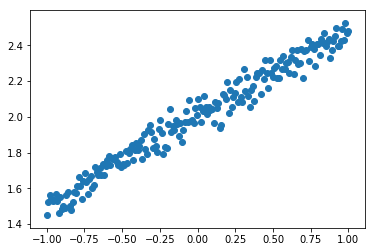

In [2]:
# create some data
X = np.linspace(-1, 1, 200)
np.random.shuffle(X)    # randomize the data
Y = 0.5 * X + 2 + np.random.normal(0, 0.05, (200, ))
# plot data
plt.scatter(X, Y)
plt.show()


In [3]:
X_train, Y_train = X[:160], Y[:160]     # train 前 160 data points
X_test, Y_test = X[160:], Y[160:]       # test 后 40 data points

## 建立模型 
然后用 Sequential 建立 model， 再用 model.add 添加神经层，添加的是 Dense 全连接神经层。

参数有两个，一个是输入数据和输出数据的维度，本代码的例子中 x 和 y 是一维的。

如果需要添加下一个神经层的时候，不用再定义输入的纬度，因为它默认就把前一层的输出作为当前层的输入。在这个例子里，只需要一层就够了。



In [4]:
model = Sequential()
model.add(Dense(output_dim=1, input_dim=1))

/Users/play/.py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=1, units=1)`
  


## 激活模型 
接下来要激活神经网络，上一步只是定义模型。

参数中，误差函数用的是 mse 均方误差；优化器用的是 sgd 随机梯度下降法。

In [5]:
# choose loss function and optimizing method
model.compile(loss='mse', optimizer='sgd')

## 训练模型 
训练的时候用 model.train_on_batch 一批一批的训练 X_train, Y_train。默认的返回值是 cost，每100步输出一下结果。

In [6]:
# training
print('Training -----------')
for step in range(301):
    cost = model.train_on_batch(X_train, Y_train)
    if step % 100 == 0:
        print('train cost: ', cost)

"""
Training -----------
train cost:  4.111329555511475
train cost:  0.08777070790529251
train cost:  0.007415373809635639
train cost:  0.003544030711054802
"""

Training -----------
train cost:  4.0225
train cost:  0.0732386
train cost:  0.00386274
train cost:  0.00264345


'\nTraining -----------\ntrain cost:  4.111329555511475\ntrain cost:  0.08777070790529251\ntrain cost:  0.007415373809635639\ntrain cost:  0.003544030711054802\n'

## 检验模型 
用到的函数是 model.evaluate，输入测试集的x和y， 输出 cost，weights 和 biases。其中 weights 和 biases 是取在模型的第一层 model.layers[0] 学习到的参数。从学习到的结果你可以看到, weights 比较接近0.5，bias 接近 2。

In [7]:
# test
print('\nTesting ------------')
cost = model.evaluate(X_test, Y_test, batch_size=40)
print('test cost:', cost)
W, b = model.layers[0].get_weights()
print('Weights=', W, '\nbiases=', b)


Testing ------------
40/40 [==============================] - 0s
test cost: 0.00313670327887
Weights= [[ 0.4922711]] 
biases= [ 1.99950218]
